# Credit Card Fraud Detection
## By S.V. Sriram Erramilli

# Problem Statement:
Finex is a leading financial service provider based out of Florida, US. It offers a wide range of products and business services to customers through different channels, ranging from in-person banking and ATMs to online banking. Over the last few years, Finex has observed that a significantly large number of unauthorised transactions are being made, due to which the bank has been facing a huge revenue and profitability crisis. Many customers have been complaining about unauthorised transactions being made through their credit/debit cards. It has been reported that fraudsters use stolen/lost cards and hack private systems to access the personal and sensitive data of many cardholders. They also indulge in ATM skimming at various POS terminals such as gas stations, shopping malls, and ATMs that do not send alerts or do not have OTP systems through banks. Such fraudulent activities have been reported to happen during non-peak and odd hours of the day leaving no room for suspicion.

In most cases, customers get to know of such unauthorised transactions happening through their cards quite late as they are unaware of such ongoing credit card frauds or they do not monitor their bank account activities closely. This has led to late complaint registration with Finex and by the time the case is flagged fraudulent, the bank incurs heavy losses and ends up paying the lost amount to the cardholders.

Now, Finex is also not really equipped with the latest financial technologies, and it is becoming difficult for the bank to track these data breaches on time to prevent further losses. The Branch Manager is worried about the ongoing situation and wants to identify the possible root causes and action areas to come up with a long-term solution that would help the bank generate high revenue with minimal losses.



# Steps to be performed:
1. Data Understanding
2. Exploratory Data Analyses (EDA)
3. Train-Test split
4. Model building and evaluation

# 1. Data Understanding

In [25]:
# importing necessary libraries for data loading and EDA
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import joblib
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [ ]:
# Loading the train data
df_train = pd.read_csv(r'/home/ducanh/Credit Card Transactions Fraud Detection/Datasets/fraudTrain.csv')

# check
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [27]:
# check the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [28]:
# check if there are any duplicates in the 'trans_num' column
df_train['trans_num'].duplicated().sum()

np.int64(0)

There are no duplicates in transaction number column

In [29]:
# how many card holders are there
len(df_train['cc_num'].unique())

983

There are 983 cardholders in the train data.

In [30]:
# defining a function that performs the basic data cleaning operations
def data_clean_1(df):
    df = df.iloc[:,1:]
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['dob'] = pd.to_datetime(df['dob'])
    return df
                                                 
# applying the function on our train dataframe
df_train = data_clean_1(df_train)
    
# check
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [31]:
# check 2
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [32]:
# let's do the same operation for test data as well
df_test = pd.read_csv(r'/home/ducanh/Credit Card Transactions Fraud Detection/Datasets/fraudTest.csv')

# check
# df_test.head()

In [33]:
# info
# df_test.info()

In [34]:
# applying the function on our train dataframe
df_test = data_clean_1(df_test)

# check
# df_test.info()

In [35]:
# let's concat both the train and test dataframes into one dataframe
df = pd.concat([df_train, df_test])

# check
# df.info()

In [36]:
# cross check
df['trans_num'].duplicated().sum()

np.int64(0)

In [37]:
if len(df) == len(df['trans_num'].unique()):
    print('The data is at transaction level')
else:
    print('The data is not at transaction level')

The data is at transaction level


In [38]:
# df.head()

In [39]:
#how many card holders are there in the data
len(df['cc_num'].unique())
len(df['merchant'].unique())

693

#### Card holders = 999, Merchants = 693

In [40]:
# resetting index
df.reset_index(inplace=True)

In [41]:
# resetting the index
df.reset_index(inplace=True)
df.drop('index',axis = 1,inplace = True)

# check
# df.info()

#### Average number of transactions per month

In [42]:
# deriving a unique month column w.r.t each year
df['trans_year_month'] = df['trans_date_trans_time'].apply(lambda x: str(x)[:7])

# check
df[['trans_date_trans_time','trans_year_month']]

,trans_date_trans_time,trans_year_month
0,2019-01-01 00:00:18,2019-01
1,2019-01-01 00:00:44,2019-01
2,2019-01-01 00:00:51,2019-01
3,2019-01-01 00:01:16,2019-01
4,2019-01-01 00:03:06,2019-01
...,...,...
1852389,2020-12-31 23:59:07,2020-12
1852390,2020-12-31 23:59:09,2020-12
1852391,2020-12-31 23:59:15,2020-12
1852392,2020-12-31 23:59:24,2020-12


In [43]:
# how many months of data is available
len(df['trans_year_month'].unique())

24

In [44]:
# avg number of transactions per month is computed as
avg_nbr_of_txns = len(df['trans_num'].unique())/len(df['trans_year_month'].unique())
print('Average number of transactions per month = ',round(avg_nbr_of_txns))

Average number of transactions per month =  77183


#### Average number of fradulent transactions per month

In [45]:
# number of fradulent transactions
print('The total number of Fraudulent transactions in the given 2 years period are',len(df[df['is_fraud'] == 1]['trans_num'].unique()))

The total number of Fraudulent transactions in the given 2 years period are 9651


In [46]:
# avg number of fradulent transactions per month
print('Average number of fraudulent transactions per month = ', round(len(df[df['is_fraud'] == 1]['trans_num'].unique())/len(df[df['is_fraud'] == 1]['trans_year_month'].unique())))

Average number of fraudulent transactions per month =  402


In [47]:
# Total value of fraudulent transactions in the given period of 2 years
'$'+str(np.sum(df[df['is_fraud'] == 1]['amt']))

'$5121413.290000001'

In [48]:
len(df[df['is_fraud'] == 1]['trans_num'].unique())

9651

# 2. Exploratory Data Analyses (EDA)

In [49]:
# check info of the dataframe
# df.info()

In [50]:
# checking the transaction amount column w.r.t fraudulent transactions
# df[df['is_fraud'] == 1]['amt'].describe()

In [51]:
# plt.figure(figsize = (15,3))
# sns.displot(df[df['is_fraud'] == 1]['amt'])

### Analyses w.r.t. customer demographic information

In [52]:
# deriving age column.
# since this data is till 2020 Dec 31, We will compute age of each customer during 2021.
df['cust_age'] = df['dob'].dt.year.apply(lambda x: 2021-x)

# check
# df['cust_age']

In [53]:
# # visualize Age Vs fraudulent transaction amounts
# plt.figure(figsize = (12,5))
# plt.title('Age Vs Transaction amount')
# plt.scatter(df[df['is_fraud'] == 1]['cust_age'],df[df['is_fraud'] == 1]['amt'])
# plt.show()

`Inferences:` There's no specific pattern, let's bucket the age column and see the trend towards transaction amount.

In [54]:
# let's bucket the age column
df['cust_age_groups'] = df['cust_age'].apply(lambda x: 'below 10' if x<10 else ('10-20' if x>=10 and x<20 else ('20-30' if x>=20 and x<30 else('30-40' if x>=30 and x<40 else('40-50' if x>=40 and x<50 else('50-60' if x>=50 and x<60 else('60-70' if x>=60 and x<70 else ('70-80' if x>=70 and x<80 else 'Above 80'))))))))

# check
# df.head()

In [55]:
# now let's see which customer age group was more prone towards the number of fraudulent transactions
age_piv = pd.pivot_table(data = df,
                         index = 'cust_age_groups',
                         columns = 'is_fraud',
                         values = 'trans_num',
                         aggfunc = 'count')

# check
# age_piv

In [56]:
# age_piv.plot(kind = 'bar', title = 'Age group vulnerability', xlabel = 'Age groups',ylabel = 'No. of transactions',figsize = (9,3),rot = 45 )

In [57]:
# # let's see only fraudlent transactions 
# plt.figure(figsize = (9,3))
# plt.title('Age group vulnerability')
# sns.barplot(data = age_piv, x = age_piv.index, y = age_piv[1].values )
# plt.xlabel('customer age groups')
# plt.ylabel('Number of Fradulent transactions')
# plt.show()

`Inferences:`
Customers who are in the 30-40 age group are more vulnerable to the number of fradulent transactions.

Let's find how much it costed for the bank on an average for each age group in the case of fradulent transactions.

In [58]:
age_piv_2 = pd.pivot_table(data = df,
                           index = 'cust_age_groups',
                           columns = 'is_fraud',
                           values = 'amt',
                           aggfunc = np.mean)

# check
# age_piv_2

In [59]:
# # let's visualize only the fraudlent transactions 
# plt.figure(figsize = (15,7.5))
# plt.title('Avg Cost incurred to Bank due to the fraudulent transactions')
# sns.barplot(data = age_piv_2, x = age_piv_2.index, y = age_piv_2[1].values)
# plt.axhline(y = 530.66, color = 'r', linestyle = '-', label = 'Avg amount per fraudulent transaction')
# plt.grid()
# plt.xlabel('customer age groups')
# plt.ylabel('Avg Cost in $ (USD)')
# plt.legend()
# plt.show()

`Inferences:` 
Avg cost incurred is greater than the overall average transaction amount per fraudulent transaction, for the customers belonging to the age groups `10-30` and `>=50`

In [60]:
# deep dive into gender
age_gen_piv = pd.pivot_table(data = df,
                           index = ['cust_age_groups','gender'],
                           columns = 'is_fraud',
                           values = 'amt',
                           aggfunc = np.mean)

# check
# age_gen_piv

`Inferences:` Banks average compensation is high for the males belonging to age group `10-20` which is $657.74. Except `60-70` and `Above 80` in all the other age groups, males are dominating more in terms of average compensation received compared to their female counterparts.

#### Analysis w.r.t. Customers Job categories 

In [61]:
# see all the customer job categories in the data
# df['job'].value_counts()

Is there any relationship between Customer's professional information and the fraudulent transactions?

In [62]:
job_txn_piv = pd.pivot_table(data = df,
                         index = 'job',
                         columns = 'is_fraud',
                         values = 'trans_num',
                         aggfunc = 'count')


# job_txn_piv.sort_values(by = 1, ascending = False, inplace = True)

In [63]:
# check the top 10 job categories of the customers which are more vulnerable towards fradulent transactions
# job_txn_piv[:10]

In [64]:
# avg cost incurred to bank due to fraudulent transactions w.r.t. each customer job category
job_txn_piv_2 = pd.pivot_table(data = df,
                               index = 'job',
                               columns = 'is_fraud',
                               values= 'amt',
                               aggfunc = np.mean)

# check
# job_txn_piv_2

In [65]:
# visualizing the top 10 job categories from high avg cost
job_txn_piv_2.sort_values(by = 1, ascending = False, inplace = True)

# check
# job_txn_piv_2[:10]

`Inferences:`Average cost incurred is highest for those customers who are Health promotion specialists. It is $920.25

#### Top states having high average cost incurred to bank

In [66]:
state_piv = pd.pivot_table(data = df,
                           index = 'state',
                           columns = 'is_fraud',
                           values = 'amt',
                           aggfunc = np.mean)
# check
# state_piv

In [67]:
# state_piv.sort_values(by = 1, ascending = False)

`Inferences:` Average cost per month incurred to bank is highest for those customers who belong to `Rhode Island` state, which is $732.98.

#### How city population varies w.r.t. the Fraudulent transaction amount ?

In [68]:
# plt.figure(figsize = (12,3))
# plt.title('Fraudulent Transaction amount w.r.t City population')
# sns.scatterplot(data = df[df['is_fraud'] == 1], x = df[df['is_fraud'] == 1]['city_pop'], y = df[df['is_fraud'] == 1]['amt'])
# plt.xlabel('City population')
# plt.ylabel('Transaction amount in $ (USD)')
# plt.show()

`Inferences:` There's no specific pattern observed.

In [69]:
# df.info()

#### Top cities which are having high avg cost incurred to bank

In [70]:
# deriving a column containing city and its respective state
df['city-state'] = df['city']+'-'+df['state']

# check
# df['city-state']

In [71]:
# pivoting
city_piv = pd.pivot_table(data = df,
                          index = 'city-state',
                          columns = 'is_fraud',
                          values = 'amt',
                          aggfunc = np.mean)

# check
# city_piv

In [72]:
# orderding the cost incurred due to fraudulent transactions in descending order
city_piv.sort_values(by = 1, ascending = False, inplace = True)

# check the top 10 cities
# city_piv[:10]

`Inferences:` 
- Average cost per month incurred to bank is highest for those customers who belong to `De Lancey` city in `Newyork` state, which is `$926.15`.
- Cities North East and Karns City, both belonging to Pennsylvania state have recorded only the Fraudulent transactions.  

#### Top merchant categories which are targeted while performing fraudulent transactions in terms of average transaction amount.

In [73]:
# df[df['is_fraud'] == 1].groupby('category')['amt'].mean().sort_values(ascending = False)
merch_piv = pd.pivot_table(data = df,
                           index = df['category'],
                           columns = 'is_fraud',
                           values = 'amt',
                           aggfunc = np.mean)

# check
# merch_piv

In [74]:
# Merchant categories which costed greater than or equal to the average fraudulent transaction cost
# merch_piv[merch_piv[1]>=530.66]

In [75]:
# plt.figure(figsize = (15,5))
# plt.title("Average transaction amount across all merchant categories")
# sns.barplot(data = merch_piv,
#             x = merch_piv.index,
#             y = merch_piv[1])
# plt.axhline(y = 530.66, color = 'r', linestyle = '-', label = 'Avg amount per fraudulent transaction')
# plt.xticks(rotation = 45)
# plt.xlabel('Merchant categories')
# plt.ylabel('Average transaction amount in $')
# plt.legend()
# plt.grid()
# plt.show()

`Inferences:` High value fraudulent transactions happened for the merchant category `shopping_net` which means online shopping.

#### How is the geographical distance between customer location to merchant location varies with respect to the fradulent transaction amount

In [76]:
# function to determine distance between two coordinates
# link to this function: - https://www.geeksforgeeks.org/program-distance-two-points-earth/
from math import radians, cos, sin, asin, sqrt
def distance(df, lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    df['lon1'] = df[lon1].apply(lambda x: radians(x))
    df['lon2'] = df[lon2].apply(lambda x: radians(x))
    df['lat1'] = df[lat1].apply(lambda x: radians(x))
    df['lat2'] = df[lat2].apply(lambda x: radians(x))
      
    # Haversine formula
    df['dlon'] = df['lon2'] - df['lon1']
    df['dlat'] = df['lat2'] - df['lat1']

    df['a'] = df['dlat'].apply(lambda x: sin(x/2)**2) + df['lat1'].apply(lambda x: cos(x))*df['lat2'].apply(lambda x: cos(x))*df['dlon'].apply(lambda x: sin(x/2)**2)
 

    df['c'] = df['a'].apply(lambda x: 2*asin(sqrt(x)))
    
    # Radius of earth in kilometers = 6371. Use 3956 for miles
    r = 3956
      
    # calculate the result
    return(df['c'] * r)

In [77]:
df['distance_bw_cust_merch_in_miles'] = distance(df,lat1 = 'lat', lat2 = 'merch_lat', lon1 = 'long', lon2 = 'merch_long')

# check
# df['distance_bw_cust_merch_in_miles']

In [78]:
# check 2
# df.head()

In [79]:
# let's bucket the distance between customer and merchant
df['distance_cust_merch'] = df['distance_bw_cust_merch_in_miles'].apply(lambda x: '< 20' if x>0 and x<=20 else('20-40' if x>20 and x<=40 else('40-60' if x>40 and x<=60 else('60-80' if x>60 and x<=80 else '> 80'))))

# check
# df[['distance_bw_cust_merch_in_miles','distance_cust_merch']]

In [80]:
# let's see how w.r.t distance transaction amount varies
dis_piv = pd.pivot_table(data = df,
                         index = 'distance_cust_merch',
                         columns = 'is_fraud',
                         values = 'amt',
                         aggfunc = np.mean)

# check
# dis_piv

In [81]:
# # now let's see how fraudulent transaction amount varies w.r.t. the distance between customer and merchant location
# plt.figure(figsize = (12,3))
# plt.title('Fraudulent Transaction amount w.r.t distance between customer and merchant')
# sns.barplot(data = dis_piv, x = dis_piv.index, y = dis_piv[1])
# plt.xlabel('Distance between customer and merchant in miles')
# plt.ylabel('Fraudulent transaction amount in $ (USD)')
# plt.show()

`Inferences:` High average cost incurred to bank is from those customers who are just less than 20 miles away from their merchants. But still we are unable to identify the specific pattern w.r.t distance.

#### How an average transaction amount varies w.r.t each month

In [82]:
time_series_piv = pd.pivot_table(data = df,
                                 index = 'trans_year_month',
                                 columns = 'is_fraud',
                                 values = 'amt',
                                 aggfunc = np.mean)

# check
# time_series_piv

In [83]:
# # let's visualize this
# plt.figure(figsize = (12,3))
# plt.title('Avg transaction amount varying w.r.t. time')
# plt.plot(time_series_piv.index, time_series_piv[0], color = 'green', label = 'Non Fraudulent transaction')
# plt.plot(time_series_piv.index, time_series_piv[1], color = 'red', label = 'Fraudulent transaction')
# plt.grid()
# plt.xlabel('Months')
# plt.ylabel('Avg Transaction amount in $')
# plt.xticks(rotation = 45)
# plt.legend()
# plt.show()

`Inferences:` It is irregular and there's no pattern w.r.t. time

In [84]:
#let's check the frequency of fraudulent transactions w.r.t month and year
time_series_piv2 = pd.pivot_table(data = df[df['is_fraud'] == 1],
                                 index = 'trans_year_month',
                                 columns = 'is_fraud',
                                 values = 'trans_num',
                                 aggfunc = 'count')

# check
# time_series_piv2

In [85]:
# # let's visualize this
# plt.figure(figsize = (12,3))
# plt.title('Frequency of fraudulent transactions w.r.t. time')
# plt.plot(time_series_piv2.index, time_series_piv2[1], color = 'red', label = 'Fraudulent transaction')
# plt.grid()
# plt.xlabel('Months')
# plt.ylabel('Frequency of transactions')
# plt.xticks(rotation = 45)
# plt.legend()
# plt.show()

In [86]:
# # how transaction amount varies w.r.t unix time
# plt.figure(figsize = (12,3))
# plt.title('Transaction amount w.r.t unix time')
# sns.scatterplot(data = df, x = df['unix_time'],y = df['amt'])
# plt.show()

`Inferences:` There's no specific pattern w.r.t. the unix time.

In [87]:
# deriving hours from the transaction date time column
df['trans_hour'] = df['trans_date_trans_time'].dt.time.apply(lambda x: str(x)[:2])

# check
# df['trans_hour']

#### Let's figure out usually at what hour of the time, the frequency of fradulent transactions is high

In [88]:
time_piv = pd.pivot_table(data = df,
                          index = 'trans_hour',
                          columns = ['is_fraud'],
                          values = 'trans_num',
                          aggfunc = 'count')

# check
# time_piv

In [89]:
#  # let's visualize
# plt.figure(figsize = (15,3))
# plt.title('Frequency of fraudulent transactions w.r.t Hour')
# sns.barplot(data = time_piv, x = time_piv.index, y = time_piv[1])
# plt.xlabel('Hours')
# plt.ylabel('Fraudulent transactions')
# plt.grid()
# plt.show()

`Inferences:` In the two years span, high number of transactions happened during night time, i.e., from 10 PM to 3 AM.

#### Let's figure out at what hour of the time, average cost incurred to bank is high

In [90]:
time_piv_amt = pd.pivot_table(data = df,
                              index = 'trans_hour',
                              columns = ['is_fraud'],
                              values = 'amt',
                              aggfunc = np.mean)

# check
# time_piv_amt

In [91]:
#  # let's visualize
# plt.figure(figsize = (15,3))
# plt.title('Avg cost incurred due to fraudulent transactions w.r.t. each hour')
# sns.barplot(data = time_piv_amt, x = time_piv_amt.index, y = time_piv_amt[1])
# plt.axhline(y = 530.66, color = 'r', linestyle = '-', label = 'Avg amount per fraudulent transaction')
# plt.grid()
# plt.xlabel('Hours')
# plt.ylabel('Avg cost incurred in $')
# plt.legend()
# plt.show()

`Inferences:` Average cost incurred to bank is highest during 2 PM, i.e., $ 709.07. 

It is in the range between $(600-750) from 12 PM to 11 PM.

In [92]:
merch_txn_hr_piv = pd.pivot_table(data = df,
                                  index = ['trans_hour','category'],
                                  columns = 'is_fraud',
                                  values = 'amt',
                                  aggfunc = np.mean)

# check
# merch_txn_hr_piv

Save this file to disk and visualize it in Power BI.

In [93]:
#merch_txn_hr_piv.to_csv('merchant_txn_hours.csv', index = True)

### For model building, let's remove all the redundant columns from the dataframe

In [94]:
# all Columns
# df.columns

In [95]:
# columns to be dropped, except trans_num, which we will be dealing further
drop_col = ['trans_date_trans_time', 'cc_num', 'merchant','first', 'last', 'street', 'city', 'state', 'lat',
       'long','dob', 'unix_time', 'merch_lat',
       'merch_long', 'trans_year_month', 'cust_age','city_pop',
       'city-state', 'lon1', 'lon2', 'lat1', 'lat2', 'dlon',
       'dlat', 'a', 'c', 'distance_bw_cust_merch_in_miles',
       'distance_cust_merch']

# dropping above columns from the dataframe
df.drop(drop_col, axis = 1, inplace = True)

# check
# df.head()

#### Let's convert the categorical columns (except gender) into numerical columns based on the avg fraudulent txn amount w.r.t. each category

In [96]:
# let's label encode age column w.r.t the avg fraudulent txn amount
age_piv_2.sort_values(by = 1, ascending = True, inplace = True)

# age_piv_2

In [97]:
# get dictionary
age_dic = {k:v for (k,v) in zip(age_piv_2.index.values, age_piv_2.reset_index().index.values)}

# check
# age_dic

In [98]:
# label encoding the age groups column
df['cust_age_groups'] = df['cust_age_groups'].map(age_dic)

# check
# df['cust_age_groups']

In [99]:
# now let's encode merchant category
merch_cat = df[df['is_fraud'] == 1].groupby('category')['amt'].mean().sort_values(ascending = True)

# check
# merch_cat

In [100]:
merch_cat_dic = {k:v for (k,v) in zip(merch_cat.index.values,merch_cat.reset_index().index.values)}

# check
# merch_cat_dic

In [101]:
# encoding the merchant_category column
df['category'] = df['category'].map(merch_cat_dic)

# check
# df['category']

In [102]:
job_txn_piv_2.sort_values(by = 1, ascending = True, inplace = True)

# check
# job_txn_piv_2

In [103]:
job_txn_piv_2[1].fillna(0, inplace = True)

# check
# job_txn_piv_2

In [104]:
job_txn_piv_2.sort_values(by = 1, ascending = True, inplace = True)

# job_txn_piv_2

In [105]:
# job categories
job_cat_dic = {k:v for (k,v) in zip(job_txn_piv_2.index.values, job_txn_piv_2.reset_index().index.values)}

# check
# job_cat_dic

In [106]:
# label encoding the job column
df['job'] = df['job'].map(job_cat_dic)

# check
# df['job']

In [107]:
# check
# df.head()
# check 2
# df.info()

In [108]:
# check 2
# df.info()

In [109]:
# let's convert trans_hour into numerical format
df['trans_hour'] = df['trans_hour'].astype('int')

# check
# df['trans_hour']

In [110]:
# df.info()

In [111]:
# create dummies for 'gender' column
df = pd.get_dummies(data  = df, columns = ['gender'], drop_first = True, dtype = 'int')

# # check
# df.head()

# 3. Train-Test split

In [112]:
train,test = train_test_split(df, test_size=0.33, random_state=42, stratify = df['is_fraud'])
# visualizing class imbalance
df['is_fraud'].value_counts()
# check
print(train.shape)
print(test.shape)

(1241103, 10)
(611291, 10)


In [113]:
# # check
# train.head()
# # check
# test.head()

In [114]:
# check class proportions in train and test datasets
print(train['is_fraud'].value_counts())
print(test['is_fraud'].value_counts())

is_fraud
0    1234637
1       6466
Name: count, dtype: int64
is_fraud
0    608106
1      3185
Name: count, dtype: int64


In [115]:
# check for missing values in train data
train.isna().sum()
# check for missing values in test data
test.isna().sum()

level_0            0
category           0
amt                0
zip                0
job                0
trans_num          0
is_fraud           0
cust_age_groups    0
trans_hour         0
gender_M           0
dtype: int64

In [116]:
# # storing the transaction numbers from both train and test data into separate dataframes respectively
# txn_train = pd.DataFrame(train[['trans_num','amt']].values, columns = ['txn_num','amt'])
# txn_test = pd.DataFrame(test[['trans_num','amt']].values, columns = ['txn_num','amt'])

In [117]:
# let's drop transaction number columns from both the training and testing data
train.drop('trans_num',axis = 1, inplace = True)
test.drop('trans_num',axis = 1, inplace = True)
# splitting data into dependent and independent features respectively
y_train = train['is_fraud']
X_train = train.drop('is_fraud',axis = 1)

y_test = test['is_fraud']
X_test = test.drop('is_fraud',axis = 1)

print('Shape of training data: ',(X_train.shape,y_train.shape))
print('Shape of testing data: ',(X_test.shape,y_test.shape))

Shape of training data:  ((1241103, 8), (1241103,))
Shape of testing data:  ((611291, 8), (611291,))


In [118]:
# let's delete all the reduntant data frames
del df_train
del df_test
del age_piv
del age_piv_2
del age_gen_piv
del job_txn_piv
del job_txn_piv_2
del state_piv
del city_piv
del time_series_piv

In [119]:
# # let's see how the numerical columns are distributed
# sns.displot(X_train['amt'])

In [120]:
# applying log transformations
X_train['amt'] = np.log(X_train['amt']+1)
X_test['amt'] = np.log(X_test['amt']+1)


In [121]:
# # Visualizing for train data
# sns.distplot(X_train['amt'])
# # visualizing for test data
# sns.distplot(X_test['amt'])

<Axes: xlabel='amt', ylabel='Density'>

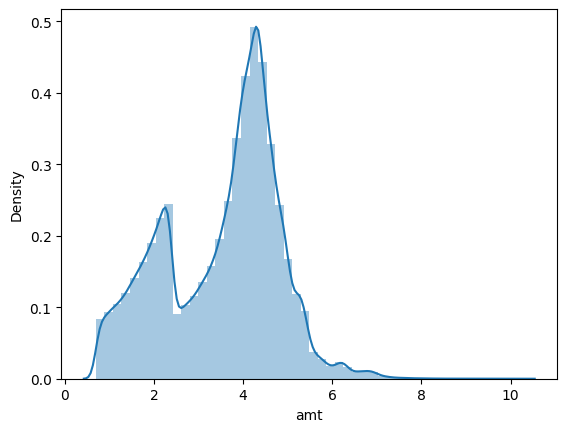

In [122]:
# visualizing for test data
sns.distplot(X_test['amt'])

In [123]:
# # saving the train and test datasets to disk
# X_train.to_csv('X_train.csv', index = False)
# y_train.to_csv('y_train.csv',index = False)
# X_test.to_csv('X_test.csv', index = False)
# y_test.to_csv('y_test.csv',index = False)

# 4. Model building and evaluation

## A) Logistic regression

In [124]:
# let's scale the variables using standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [125]:
# scaling the training and testing data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [126]:
# convert them into dataframes
X_train_sc = pd.DataFrame(data = X_train_sc, columns = X_train.columns)
X_test_sc = pd.DataFrame(data = X_test_sc, columns = X_test.columns)

In [127]:
# check 1
# X_train_sc.head()
# check 2
# X_test_sc.head()

In [128]:
# # check correlation among all the independent features in train data
# plt.figure(figsize = (10,3))
# plt.title("Check Correlation among all the independent features")
# sns.heatmap(X_train_sc.corr(),annot = True, cmap = 'Greens')
# plt.xticks(rotation = 45)
# plt.show()


`Inferences:` `job` feature is correlated to `cust_age_groups` and `gender_M` features of about 25% and 24% respectively. Rest all features have very less correlation among themselves.

`Reference:` https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

In [129]:
# let's build our first logistic regression model with class weight = 'balanced' since we have highly imbalanced data.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, precision_score, recall_score, roc_auc_score, roc_curve

lr = LogisticRegression(class_weight = 'balanced')

In [130]:
# fitting on the training data
lr.fit(X_train_sc,y_train)

# predictions on the training data
y_pred_train = lr.predict(X_train_sc)

# check
y_pred_train
# predictions on the test data
y_pred_test = lr.predict(X_test_sc)

# check
y_pred_test

array([0, 1, 0, ..., 0, 0, 0], shape=(611291,))

In [131]:
# let's check the evaluation metrics, import confusion matrix
from sklearn.metrics import confusion_matrix

# for train data
## TN FP
## FN TP
print(confusion_matrix(y_train, y_pred_train))
# test data
print(confusion_matrix(y_test, y_pred_test))

[[960519 274118]
 [  1451   5015]]
[[472228 135878]
 [   677   2508]]


In [132]:
print(f'ROC_AUC score on train data is {roc_auc_score(y_train,y_pred_train)} and on test data is {roc_auc_score(y_test,y_pred_test)}')
# accuracy score
print(f'Accuracy on train data is {accuracy_score(y_train,y_pred_train)} and on test data is {accuracy_score(y_test,y_pred_test)}')
# recall score on train and test data
print(f'Recall score on train data = {recall_score(y_train, y_pred_train)}')

print(f'Recall score on test data = {recall_score(y_test, y_pred_test)}')

ROC_AUC score on train data is 0.7767861344221845 and on test data is 0.7819982667340576
Accuracy on train data is 0.7779644396959801 and on test data is 0.7766121209047737
Recall score on train data = 0.7755954222084751
Recall score on test data = 0.7874411302982731


Let's try to improve the recall score by trying different thresholds or cut-offs.

<Axes: title={'center': 'Range of probabilities of getting fraud'}, ylabel='Frequency'>

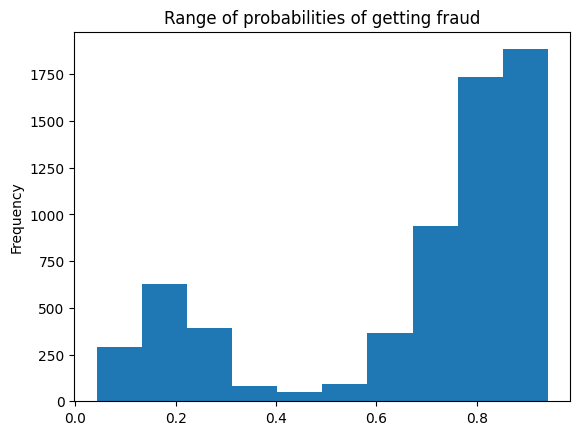

In [137]:
# # let's get predicted probabilites for train data
y_pred_train_proba = lr.predict_proba(X_train_sc)

# # check
y_pred_train_proba
# # let's get predicted probabilities for test data
y_pred_test_proba = lr.predict_proba(X_test_sc)

# # check
y_pred_test_proba
y_train_results = pd.DataFrame(y_pred_train_proba, columns = ['pred_not_fraud','pred_fraud'])

# # check
y_train_results
y_train_results['y_train_actual'] = y_train.values

# # check
y_train_results
# # check the range of probabilities of getting fraud.
y_train_results[y_train_results['y_train_actual'] == 1]['pred_fraud'].plot(kind = 'hist', title = 'Range of probabilities of getting fraud')

In [138]:
y_test_results = pd.DataFrame(y_pred_test_proba, columns = ['pred_not_fraud','pred_fraud'])

# # check
y_test_results
y_test_results['y_test_actual'] = y_test.values

# # check
# y_test_results

In [139]:
y_test_results['y_test_actual'] = y_test.values

# check
y_test_results

,pred_not_fraud,pred_fraud,y_test_actual
0,0.696974,0.303026,0
1,0.362063,0.637937,0
2,0.964957,0.035043,0
3,0.678800,0.321200,0
4,0.943907,0.056093,0
...,...,...,...
611286,0.753019,0.246981,0
611287,0.459657,0.540343,0
611288,0.793105,0.206895,0
611289,0.503439,0.496561,0


#### Let's find an optimal threshold point to classify whether it is a fraudulent transaction or not fraudulent transaction.

In [140]:
# Let's create columns with different probability cutoffs 
numbers = [0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_results[i]= y_train_results.pred_fraud.map(lambda x: 1 if x > i else 0)
y_train_results.head()

,pred_not_fraud,pred_fraud,y_train_actual,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.943356,0.056644,0,0,0,0,0,0,0,0,0,0,0
1,0.953590,0.046410,0,0,0,0,0,0,0,0,0,0,0
2,0.951897,0.048103,0,0,0,0,0,0,0,0,0,0,0
3,0.653800,0.346200,0,1,1,1,1,0,0,0,0,0,0
4,0.823374,0.176626,0,1,1,0,0,0,0,0,0,0,0


In [141]:
# Now let's calculate recall scores for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','recall_score'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in numbers:
    cm1 = confusion_matrix(y_train_results['y_train_actual'], y_train_results[i])
    total1=sum(sum(cm1))
    
    recall_score = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i, recall_score]
print(cutoff_df)

      prob  recall_score
0.10  0.10      0.985308
0.15  0.15      0.937210
0.20  0.20      0.884782
0.30  0.30      0.803124
0.40  0.40      0.783947
0.50  0.50      0.775595
0.60  0.60      0.756418
0.70  0.70      0.665945
0.80  0.80      0.473090
0.90  0.90      0.055212


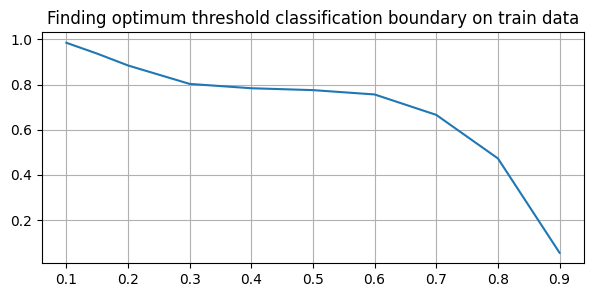

In [142]:
plt.figure(figsize = (7,3))
plt.title('Finding optimum threshold classification boundary on train data')
plt.plot(cutoff_df.prob, cutoff_df.recall_score)
plt.grid()
plt.show()

#### let's consider 0.15 as an optimal threshold point

In [145]:
# # applying on test data
y_test_results['pred_final'] = y_test_results['pred_fraud'].apply(lambda x: 1 if x>0.15 else 0)

# # check
# y_test_results.head()
# y_test_results.info()

In [146]:
# confusion matrix
## TN FP
## FN TP
cm = confusion_matrix(y_test_results['y_test_actual'],y_test_results['pred_final'] )
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
print(cm)
# computing recall score
print(f'Recall score of the model on test data = {TP/(TP+FN)}')

[[169835 438271]
 [   205   2980]]
Recall score of the model on test data = 0.9356357927786499


In [148]:
# np.array(y_test_results['y_test_actual'])
# arr1 = y_train_results[['y_train_actual',0.15]].values
# arr2 = y_test_results[['y_test_actual','pred_final']].values

# arr_f = np.concatenate((arr1, arr2), axis=0)

# arr_f
# arr_f.shape
# # lr_results = pd.DataFrame(arr_f, columns = ['is_f_actual','is_f_pred'])

# # # check
# # lr_results
# # txn_train
# # txn_test

In [147]:
txn_test

NameError: name 'txn_test' is not defined

In [ ]:
# # Adding transaction num and transaction amt columns
# lr_results['txn_amt'] = pd.concat([txn_train,txn_test])['amt'].values
# lr_results['txn_num'] = pd.concat([txn_train,txn_test])['txn_num'].values

# # check
# lr_results

,is_f_actual,is_f_pred,txn_amt,txn_num
0,0,0,8.37,1a3b2c30799a30f89d00defe95d27efd
1,0,0,2.01,17afa7441d6f1986334db9ef8d6eaedb
2,0,0,4.54,d6aecc9b07468dfe6dc3b78328f5278a
3,0,1,37.5,e24f550edd520f1e60d82086d94d497d
4,0,1,23.2,055f41732062c4383412aa029ed6861d
...,...,...,...,...
1852389,0,1,35.9,338aa875143b08d159cd44fdb76f4ffc
1852390,0,1,86.18,e878b9d59e35bdce751bef5a29040346
1852391,0,1,28.85,5a25fad9d2744927c5a1c59602e30bc2
1852392,0,1,57.78,c7fca8fb5ffb1fc602e6ee409bfef0d4


In [ ]:
# # saving the model results into a dataframe
# model_results = pd.DataFrame(columns = ['model','train_recall_score','test_recall_score','Cost saved by the model per month'])

# model_results.loc[len(model_results)] = ['Logistic Regression model', 0.93, 0.93, '$115,538.03']

# # check
# model_results
# save this data frame to disk as .csv file
# model_results.to_csv('model_results.csv', index = False)

,model,train_recall_score,test_recall_score,Cost saved by the model per month
0,Logistic Regression model,0.93,0.93,"$115,538.03"


In [ ]:
#joblib.dump(value = lr, filename = r'models\logistic_reg_model_2.pkl' )
# check whether the model is saved properly
#lr = joblib.load(r'models\logistic_reg_model_2.pkl')
# lr.feature_names_in_
# lr.class_weight
# lr.get_params()

['models\\logistic_reg_model_2.pkl']

In [ ]:
# check whether the model is saved properly
#lr = joblib.load(r'models\logistic_reg_model_2.pkl')
# lr.feature_names_in_
# lr.class_weight
# lr.get_params()

### Our Logistic regression model is successful in saving the costs per month upto $115,426.53

## B) Random Forest Classifier

In [149]:
# instantiating random forest classifier with class weights
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rf = RandomForestClassifier(class_weight = 'balanced')

In [150]:
# fitting on the training data
rf.fit(X_train,y_train)

# predictions on the training data
y_pred_train_rf = rf.predict(X_train)

# predictions on the test data
y_pred_test_rf = rf.predict(X_test)
# check predictions on train data
#y_pred_train_rf
# check predictions on test data
#y_pred_test_rf

In [151]:
# check confusion matrix on both train and test data

## TN FP
## FN TP
cm_train = confusion_matrix(y_train,y_pred_train_rf)
cm_test = confusion_matrix(y_test,y_pred_test_rf)
print('Training data:',cm_train)
print()
print('Testing data:', cm_test)
# check recall scores on train data
print(f'Recall score of the model on train data: {cm_train[1][1]/(cm_train[1][1]+cm_train[1][0])}')
# check recall scores on test data
print(f'Recall score of the model on test data: {cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])}')
# get the parameters of the model
#rf.get_params()

Training data: [[1234637       0]
 [      2    6464]]

Testing data: [[608010     96]
 [   753   2432]]
Recall score of the model on train data: 0.9996906897618311
Recall score of the model on test data: 0.7635792778649921


`Inferences:` Model overfit

In [152]:
# importing randomized search cv to do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(class_weight = 'balanced')
params = {'n_estimators':[5,10,20,40,80,100,200],
          'criterion':['gini','entropy','log_loss'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10],
          'oob_score': [True]}


#randomized search cv
rcv = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 10, scoring = 'recall', cv = 10, verbose=5, 
                                random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.982, test=0.855) total time= 1.8min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.982, test=0.841) total time= 2.0min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.980, test=0.859) total time= 2.2min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 2/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.980, test=0.852) total time= 2.6min
[CV 2/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.744, test=0.770) total time= 2.7min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 8/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.782, test=0.767) total time= 2.8min
[CV 7/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.750, test=0.720) total time= 3.0min
[CV 10/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.744, test=0.771) total time= 2.8min
[CV 6/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.747, test=0.735) total time= 3.1min
[CV 5/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.821, test=0.825) total time= 3.4min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 5/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.980, test=0.847) total time= 1.9min
[CV 4/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.765, test=0.760) total time= 3.7min
[CV 9/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.830, test=0.808) total time= 3.8min
[CV 1/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.843, test=0.876) total time= 3.8min
[CV 3/10] END criterion=log_loss, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=40, oob_score=True;, score=(train=0.747, test=0.759) total time= 4.0min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 7/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.981, test=0.828) total time= 1.8min
[CV 3/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.981, test=0.869) total time= 1.0min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.979, test=0.869) total time= 1.3min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.978, test=0.870) total time=  53.3s
[CV 6/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.981, test=0.844) total time= 2.3min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 2/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.982, test=0.887) total time= 1.5min
[CV 9/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.981, test=0.850) total time= 1.8min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 9/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.981, test=0.875) total time=  49.5s
[CV 5/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.976, test=0.872) total time= 1.2min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 10/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.978, test=0.883) total time=  49.9s
[CV 6/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.978, test=0.868) total time= 1.2min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 10/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.982, test=0.844) total time= 2.3min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 8/10] END criterion=entropy, max_depth=20, min_samples_leaf=6, min_samples_split=4, n_estimators=10, oob_score=True;, score=(train=0.982, test=0.847) total time= 2.6min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 7/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.977, test=0.848) total time= 1.5min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 8/10] END criterion=log_loss, max_depth=20, min_samples_leaf=8, min_samples_split=8, n_estimators=5, oob_score=True;, score=(train=0.977, test=0.872) total time= 1.5min
[CV 2/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.745, test=0.773) total time= 1.2min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.784, test=0.782) total time= 1.2min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.815, test=0.821) total time= 1.4min
[CV 1/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.758, test=0.782) total time= 1.7min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 6/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.750, test=0.735) total time= 1.5min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 7/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.856, test=0.841) total time= 1.5min
[CV 8/10] END criterion=log_loss, max_depth=10, min_samples_leaf=6, min_samples_split=2, n_estimators=40, oob_score=True;, score=(train=0.969, test=0.929) total time= 6.5min
[CV 5/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.749, test=0.735) total time= 1.9min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 9/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.748, test=0.737) total time= 1.4min
[CV 8/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.836, test=0.824) total time= 1.6min


/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 10/10] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=4, n_estimators=20, oob_score=True;, score=(train=0.856, test=0.879) total time= 1.7min
[CV 4/10] END criterion=log_loss, max_depth=10, min_samples_leaf=6, min_samples_split=2, n_estimators=40, oob_score=True;, score=(train=0.969, test=0.947) total time= 7.0min
[CV 9/10] END criterion=log_loss, max_depth=10, min_samples_leaf=6, min_samples_split=2, n_estimators=40, oob_score=True;, score=(train=0.971, test=0.935) total time= 7.1min
[CV 7/10] END criterion=log_loss, max_depth=10, min_samples_leaf=6, min_samples_split=2, n_estimators=40, oob_score=True;, score=(train=0.971, test=0.944) total time= 7.3min
[CV 3/10] END criterion=log_loss, max_depth=10, min_samples_leaf=6, min_samples_split=2, n_estimators=40, oob_score=True;, score=(train=0.967, test=0.935) total time= 7.3min
[CV 2/10] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=40, oob_score=True;, score=(tra

/home/ducanh/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 10/10] END criterion=log_loss, max_depth=10, min_samples_leaf=6, min_samples_split=2, n_estimators=40, oob_score=True;, score=(train=0.967, test=0.951) total time= 7.6min
[CV 2/10] END criterion=log_loss, max_depth=10, min_samples_leaf=6, min_samples_split=2, n_estimators=40, oob_score=True;, score=(train=0.968, test=0.960) total time= 7.7min
[CV 7/10] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=40, oob_score=True;, score=(train=0.997, test=0.873) total time= 7.8min
[CV 1/10] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=40, oob_score=True;, score=(train=0.998, test=0.883) total time= 7.9min
[CV 6/10] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=40, oob_score=True;, score=(train=0.998, test=0.882) total time= 7.9min
[CV 5/10] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=40, oob_score=True;, score=

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200],
                                        'oob_score': [True]},
                   random_state=42, return_train_score=True, scoring='recall',
                   verbose=5)

In [153]:
# best estimator
rcv.best_estimator_
# best score
rcv.best_score_
# let's re build random forest model
rf = rcv.best_estimator_

# fitting on train data
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=200, oob_score=True)

In [154]:
# predictions on train data
y_train_pred_rf = rf.predict(X_train)

# predictions on test data
y_test_pred_rf = rf.predict(X_test)
# check confusion matrix on both train and test data
## TN FP
## FN TP
cm_train = confusion_matrix(y_train,y_train_pred_rf)
cm_test = confusion_matrix(y_test,y_test_pred_rf)
print('Training data:',cm_train)
print()
print('Testing data:', cm_test)
# check recall scores on train data
print(f'Recall score of the model on train data: {cm_train[1][1]/(cm_train[1][1]+cm_train[1][0])}')
# check recall scores on test data
print(f'Recall score of the model on test data: {cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])}')

Training data: [[1213681   20956]
 [    194    6272]]

Testing data: [[597738  10368]
 [   158   3027]]
Recall score of the model on train data: 0.9699969068976183
Recall score of the model on test data: 0.950392464678179


In [155]:
# feature importances
feature_imp_rf = pd.DataFrame(index = X_train.columns, data = rf.feature_importances_*100, columns = ['feature_importance_%'])

# check
feature_imp_rf

,feature_importance_%
level_0,1.949404
category,14.958298
amt,60.960018
zip,0.784635
job,1.576844
cust_age_groups,1.369310
trans_hour,17.745537
gender_M,0.655954


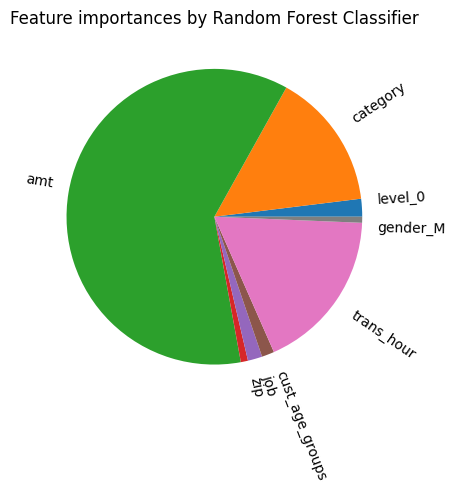

In [156]:
plt.title('Feature importances by Random Forest Classifier')
plt.pie(x = feature_imp_rf['feature_importance_%'], labels = feature_imp_rf.index, rotatelabels = True)
plt.show()

`Inferences:` As per the random forest model, the top 3 significant features are `Transaction_amount`, `Transaction_hour` and `Merchant category`. 

In [157]:
# let's drop the remaining features which are redundant and re train the model
X_train_final = X_train[['amt','trans_hour','category']]
X_test_final = X_test[['amt','trans_hour','category']]


In [158]:
# initializing random forest model
rf = rcv.best_estimator_

# fitting
rf.fit(X_train_final,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=200, oob_score=True)

In [159]:
# predictions on train data
y_train_pred_rf = rf.predict(X_train_final)

# predictions on test data
y_test_pred_rf = rf.predict(X_test_final)
# check confusion matrix on both train and test data
## TN FP
## FN TP
cm_train = confusion_matrix(y_train,y_train_pred_rf)
cm_test = confusion_matrix(y_test,y_test_pred_rf)
print('Training data:',cm_train)
print()
# check recall scores on train data
print(f'Recall score of the model on train data: {cm_train[1][1]/(cm_train[1][1]+cm_train[1][0])}')
# check recall scores on test data
print(f'Recall score of the model on test data: {cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])}')

Training data: [[1217569   17068]
 [    175    6291]]

Recall score of the model on train data: 0.9729353541602227
Recall score of the model on test data: 0.9525902668759811


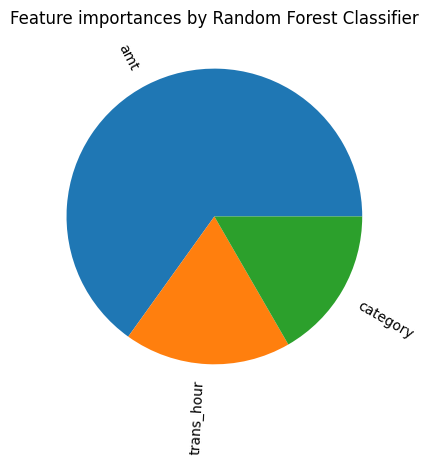

In [160]:
# feature importances
feature_imp_rf = pd.DataFrame(index = X_train_final.columns, data = rf.feature_importances_*100, columns = ['feature_importance_%'])

# check
feature_imp_rf
plt.title('Feature importances by Random Forest Classifier')
plt.pie(x = feature_imp_rf['feature_importance_%'], labels = feature_imp_rf.index, rotatelabels = True)
plt.show()